## Content
All recordings are sampled at 2 Hz. The data set consists of multiple measurement sessions, 
which can be distinguished from each other by column "profile_id". 
A measurement session can be between one and six hours long.

The motor is excited by hand-designed driving cycles denoting a reference motor speed 
and a reference torque. Currents in d/q-coordinates (columns "id" and iq") 
and voltages in d/q-coordinates (columns "ud" and "uq") are a result of a 
standard control strategy trying to follow the reference speed and torque.
Columns "motor_speed" and "torque" are the resulting quantities achieved by that strategy, derived from set currents and voltages.

Most driving cycles denote random walks in the speed-torque-plane in order to imitate real world driving cycles to a more accurate degree than constant excitations and ramp-ups and -downs would.



## Inspiration
The most interesting target features are rotor temperature ("pm"), stator temperatures ("stator_*") and torque.
Especially rotor temperature and torque are not reliably and economically measurable in a commercial vehicle.

Being able to have strong estimators for the rotor temperature helps the automotive industry to manufacture motors with less material and enables control strategies to utilize the motor to its maximum capability.
A precise torque estimate leads to more accurate and adequate control of the motor, reducing power losses and eventually heat build-up.

#### What is motor?

a motor is a machine that converts electrical energy to mechanical energy.” In another words, the electrical energy is a “battery” and the mechanical energy is the “rotation.” To explain a motor physically, the well-known “Fleming’s left hand rule” is a good approach. When electric current flows through an electrical wire placed between two magnets facing with each other, it generates force.

### Below you can picture of all three elements

In [158]:
import requests
from ipywidgets import Image
Image(value=requests.get('https://www.yaskawa-global.com/wp-content/uploads/2019/01/left-hand_en2.png').content)

ConnectionError: HTTPSConnectionPool(host='www.yaskawa-global.com', port=443): Max retries exceeded with url: /wp-content/uploads/2019/01/left-hand_en2.png (Caused by NewConnectionError('<urllib3.connection.VerifiedHTTPSConnection object at 0x000000498AB6E708>: Failed to establish a new connection: [Errno 11001] getaddrinfo failed'))

https://youtu.be/Vk2jDXxZIhs  working of synchronous motor.

### HOw torque is produced?
The torque of a synchronous motor is produced by the phase difference between the rotating magnetic field and the rotor. The torque is low when there is a small phase difference between the rotating rotor and the rotating magnetic field. The torque increases as the phase difference increases, which is due to adding additional load on the motor. The torque will reach a maximum when this phase difference approaches 90 degrees. Therefore, a synchronous motor can produce suitable torque under variable load conditions. The magnitude of the maximum torque is regulated by controlling the peak magnitude of the input current. If the torque is required to be varied independently of load, vector control (also referred to as field-orientated control) can be applied.

### How is stator temperature measured?
the stator winding temperature is calculated through the strict linear relationship between metal resistance and its temperature. The analysis and experimental results has proved that the method is feasible for monitoring stator winding temperature of PMSM.

### Why it is important to measure rotor temperature?
High-speed permanent magnet synchronous motor (PMSM) has many advantages such as high rotating speed, small volume, high efficiency, high power, and high torque density, and it has been widely used in many industrial fields. Since the excitation magnetic field is provided by permanent magnet, the performance of PMSM is highly dependent on the permanent magnet (PM) temperature; irreversible demagnetization will occur when the PM temperature rises to a certain value [1, 2]. Therefore, it is important to detect the temperature of PMs in rotor to prevent the performance degradation of PMSM.

### Methods for detecting Rotor temperature?
Methods for detecting PM temperature are mainly divided into two types: direct detection method and indirect estimation method [3, 4]. The direct detection method needs to install temperature sensors into the motor, and the sensors include contact sensors such as thermistors or thermocouples and noncontact sensors like infrared sensors [5, 6]. The advantage of the direct detection method is that temperature data are easily obtained, and the obtained data have small error. On the other hand, the direct detection method requires temperature sensors and extra complicated data transmission device [7–10], which will increase the total cost of system and reduce the robustness of control system of PMSM.

Another method is to estimate the PM temperature according to the parameters relating to temperature. Through consulting different literatures, there are three main methods for estimating the PM temperature, including thermal model, high-frequency signal injection, and back electromotive force (BEMF) [4, 5, 7, 11, 12]. The thermal model includes the finite element model (FEM) and lumped parameter model (LPM), which can provide very detailed temperature distribution of PMSM. But this method requires precise knowledge of the machine geometry, materials, and cooling system [13–15]. Furthermore, the temperature has impact on the properties of the materials, just like winding resistance, magnet remanence, and intrinsic coercivity, and the model needs to be appropriately adjusted for different motors

### T = F × r × sinθ
#### T = torque r = radius
### F = linear force


## If Fs, Fr and λ be the stator field strength, rotor field strength and angle between Fs & Fr, then the torque is given as

#### Te = FsFrSinλ


IMage of SYNCHronous motor

https://www.dfliq.net/wp-content/uploads/2015/09/electrical-motor-img.jpg 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\ajay\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv(r"F:\deep learning\my dataset\236410_504254_bundle_archive\pmsm_temperature_data.csv")
df.head(5)

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4


In [3]:
#changing or updatin column name from pm to rotor tempearture

df.rename(columns={'pm':"rotor_temp"}, inplace = True) 

In [4]:
df.columns

Index(['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'rotor_temp', 'stator_yoke', 'stator_tooth', 'stator_winding',
       'profile_id'],
      dtype='object')

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,rotor_temp,stator_yoke,stator_tooth,stator_winding
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632


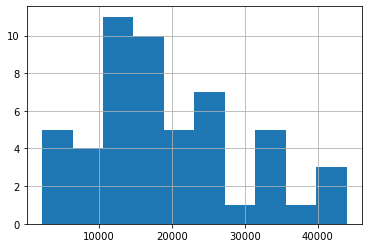

In [5]:
df['profile_id'].value_counts().hist()
df = df.drop('profile_id', axis=1)
df.head(4)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 998070 entries, 0 to 998069
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         998070 non-null  float64
 1   coolant         998070 non-null  float64
 2   u_d             998070 non-null  float64
 3   u_q             998070 non-null  float64
 4   motor_speed     998070 non-null  float64
 5   torque          998070 non-null  float64
 6   i_d             998070 non-null  float64
 7   i_q             998070 non-null  float64
 8   rotor_temp      998070 non-null  float64
 9   stator_yoke     998070 non-null  float64
 10  stator_tooth    998070 non-null  float64
 11  stator_winding  998070 non-null  float64
dtypes: float64(12)
memory usage: 91.4 MB


In [7]:
# finding coorelation between data 

cor = df.corr()
cor

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,rotor_temp,stator_yoke,stator_tooth,stator_winding
ambient,1.000000,0.434435,0.194754,0.087430,0.078283,-0.262264,0.005605,-0.260562,0.501496,0.451616,0.396742,0.301883
coolant,0.434435,1.000000,0.178708,0.027851,-0.033332,-0.189617,0.108489,-0.186060,0.430548,0.874037,0.689003,0.509298
u_d,0.194754,0.178708,1.000000,-0.027472,-0.233828,-0.821325,0.358517,-0.796586,-0.082564,0.041428,-0.066256,-0.150714
u_q,0.087430,0.027851,-0.027472,1.000000,0.716897,-0.037262,-0.181855,-0.026348,0.101236,0.106186,0.149017,0.125445
motor_speed,0.078283,-0.033332,-0.233828,0.716897,1.000000,0.024517,-0.722914,0.006323,0.332419,0.182564,0.333909,0.393154
torque,-0.262264,-0.189617,-0.821325,-0.037262,0.024517,1.000000,-0.239059,0.996560,-0.072905,-0.092207,-0.011055,0.080981
i_d,0.005605,0.108489,0.358517,-0.181855,-0.722914,-0.239059,1.000000,-0.204230,-0.299227,-0.179903,-0.387712,-0.539924
i_q,-0.260562,-0.186060,-0.796586,-0.026348,0.006323,0.996560,-0.204230,1.000000,-0.086486,-0.098753,-0.025191,0.060949
rotor_temp,0.501496,0.430548,-0.082564,0.101236,0.332419,-0.072905,-0.299227,-0.086486,1.000000,0.695014,0.768352,0.729561
stator_yoke,0.451616,0.874037,0.041428,0.106186,0.182564,-0.092207,-0.179903,-0.098753,0.695014,1.000000,0.949898,0.845144


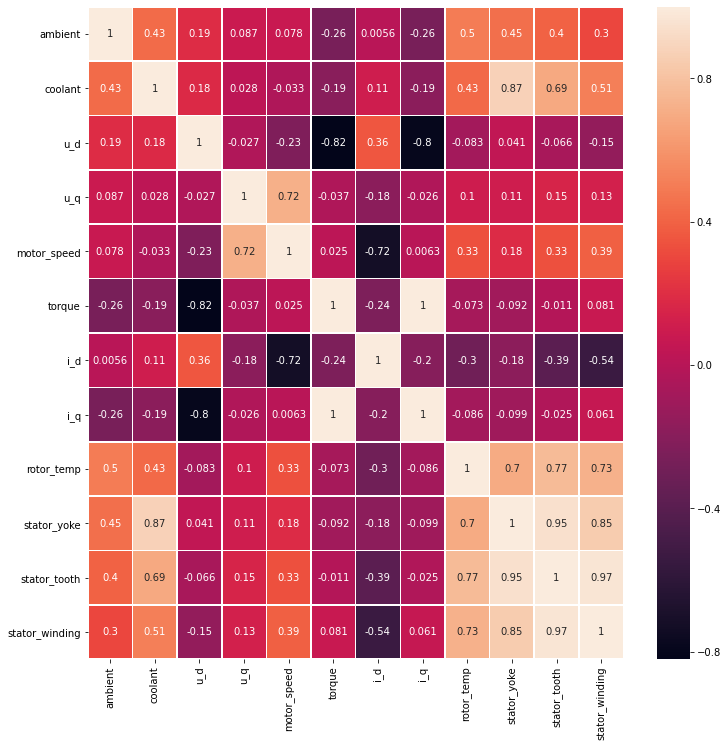

In [8]:
##plotting heatmap to visualize this data
plt.figure(figsize = (12,12))

ax = sns.heatmap(cor, linewidths=0.6, annot=True)



# # from the graph we can interpret that three major correlations

# 1. u_d vs torque
# 2. u_d vs i_q
# 3. motorspeed vs i_d

A synchronous motor - by definition - runs at a `fixed speed` dependent on the number of pole pairs in its construction, and the `frequency applied to the stator windings` regardless of its `output torque`. If the torque applied at the shaft exceeds the capacity of the motor, the motor will stall - stop turning.

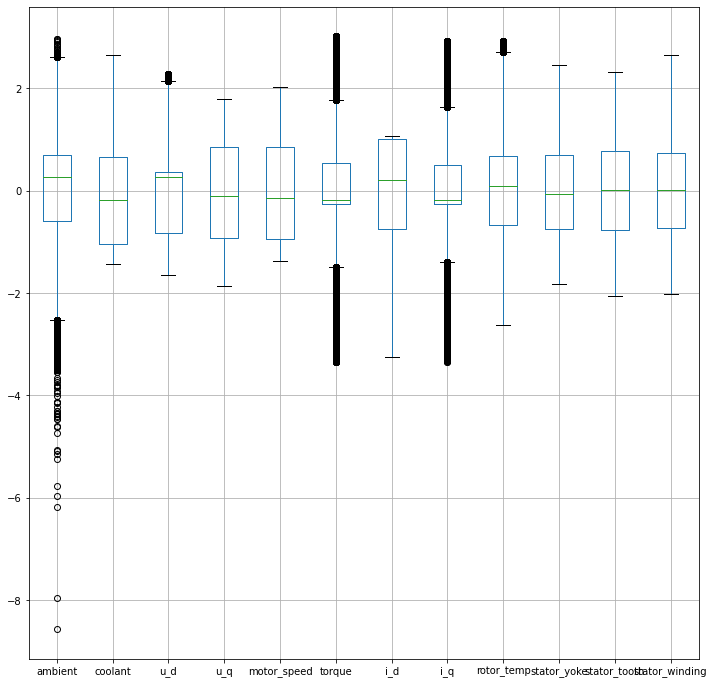

In [9]:
#finding outliers




df.columns
plt.figure(figsize=(12,12))
box_detail = df.boxplot(column=['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'torque', 'i_d',
       'i_q', 'rotor_temp', 'stator_yoke', 'stator_tooth', 'stator_winding'])


#most amount of outliers are in torque and U_d
# while Ud is related to Iq 
# and iq is related to torque 

In [10]:
#[item.get_ydata() for item in box_detail['whiskers']]

type(box_detail)

matplotlib.axes._subplots.AxesSubplot

In [11]:
#We'll build model without removing the outliers to see the effect on  the model

In [12]:
#import train test split for dividing models

from sklearn.model_selection import train_test_split

In [13]:
#excluding torque and rotor temperature as it is harder to guess

X = df.drop(['torque','rotor_temp'], axis  =1)
y= df['torque']  #output kept in other vairable.

In [14]:
X_train,X_test, Y_train, Y_test = train_test_split(X,y, test_size = 0.20, random_state = 101)

In [15]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import confusion_matrix, mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler


In [16]:

#making a simple linear model for both torque and roto_temperature.

model = LinearRegression()
model.fit(X_train, Y_train)

y_pred =model.predict(X_test)
r2 = r2_score(Y_test, y_pred)
print(r2)

0.9961984411217913


### In this section we'll do prediction for rotor temperature

In [17]:
X_r = df.drop(['torque', 'rotor_temp'], axis = 1)
y_r = df.rotor_temp

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size= 0.2, random_state = 0)

In [19]:
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7716228076705012


### Heating of rotor starts after working of motor  for some time

In [20]:
X_r = df.drop(['rotor_temp'], axis = 1)
y_r = df.rotor_temp

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size= 0.2, random_state = 0)

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.7716222822493886


In [21]:
X_r = df.drop(['torque'], axis = 1)
y_r = df.torque

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size= 0.2, random_state = 0)

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)

0.9962118456177756


## from the last two cell we learned that adding values of torque while finding rotor temp had no major effect on the output


In [22]:
# we'll try OLS method to find the significance of all columns

X = df.drop(['torque', 'rotor_temp'], axis = 1)
y = df.torque

#this calculation is for torque 
import statsmodels.api as sm
import numpy as np

X = sm.add_constant(X)
# Note the difference in argument order
model = sm.OLS(y, X).fit()
#predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 torque   R-squared:                       0.996
Model:                            OLS   Adj. R-squared:                  0.996
Method:                 Least Squares   F-statistic:                 2.606e+07
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:07:15   Log-Likelihood:             1.3649e+06
No. Observations:              998070   AIC:                        -2.730e+06
Df Residuals:                  998059   BIC:                        -2.730e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const           3.942e-05   6.17e-05      0.639      0.523   -8.15e-05       0.000
ambient           -0.0026    7.4e-05    -35.573      0.000      -0.003      -0.002
coolant            0.0046      0.000     11.639      0.000       0.004       0.005
u_d               -0.0705      0.000   -589.402      0.000      -0.071      -0.070
u_q               -0.0050      0.000    -36.494      0.000      -0.005      -0.005
motor_speed       -0.0182      0.000    -80.688      0.000      -0.019      -0.018
i_d               -0.0327      0.000   -181.100      0.000      -0.033      -0.032
i_q                0.9302      0.000   7697.818      0.000       0.930       0.930
stator_yoke        0.0308      0.001     25.137      0.000       0.028       0.033
stator_tooth      -0.0971      0.002    -63.039      0.000      -0.100      -0.094
stator_winding     0.0700      0.001     91.965      0.000       0.069       0.072
==============================================================================
Omnibus:                   293628.878   Durbin-Watson:                   0.009
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         28023864.242
Skew:                          -0.410   Prob(JB):                         0.00
Kurtosis:                      28.946   Cond. No.                         65.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
X = df.drop(['torque', 'rotor_temp'], axis = 1)
y = df.rotor_temp

In [24]:
#output of rotor temp is not increasing more than 77.6 even when it has used all datasets

X = sm.add_constant(X)
model = sm.OLS(y,X).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             rotor_temp   R-squared:                       0.772
Model:                            OLS   Adj. R-squared:                  0.772
Method:                 Least Squares   F-statistic:                 3.383e+05
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:07:19   Log-Likelihood:            -6.7373e+05
No. Observations:              998070   AIC:                         1.347e+06
Df Residuals:                  998059   BIC:                         1.348e+06
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const             -0.0010      0.000     -2.027      0.043      -0.002    -3.2e-05
ambient            0.2174      0.001    381.188      0.000       0.216       0.219
coolant           -0.2661      0.003    -87.333      0.000      -0.272      -0.260
u_d               -0.0363      0.001    -39.392      0.000      -0.038      -0.034
u_q               -0.3437      0.001   -323.263      0.000      -0.346      -0.342
motor_speed        0.3330      0.002    191.996      0.000       0.330       0.336
i_d                0.1795      0.001    129.021      0.000       0.177       0.182
i_q                0.0163      0.001     17.536      0.000       0.015       0.018
stator_yoke       -1.5581      0.009   -164.973      0.000      -1.577      -1.540
stator_tooth       4.5507      0.012    383.163      0.000       4.527       4.574
stator_winding    -2.2785      0.006   -388.143      0.000      -2.290      -2.267
==============================================================================
Omnibus:                    45736.748   Durbin-Watson:                   0.002
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           106942.020
Skew:                           0.284   Prob(JB):                         0.00
Kurtosis:                       4.500   Cond. No.                         65.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

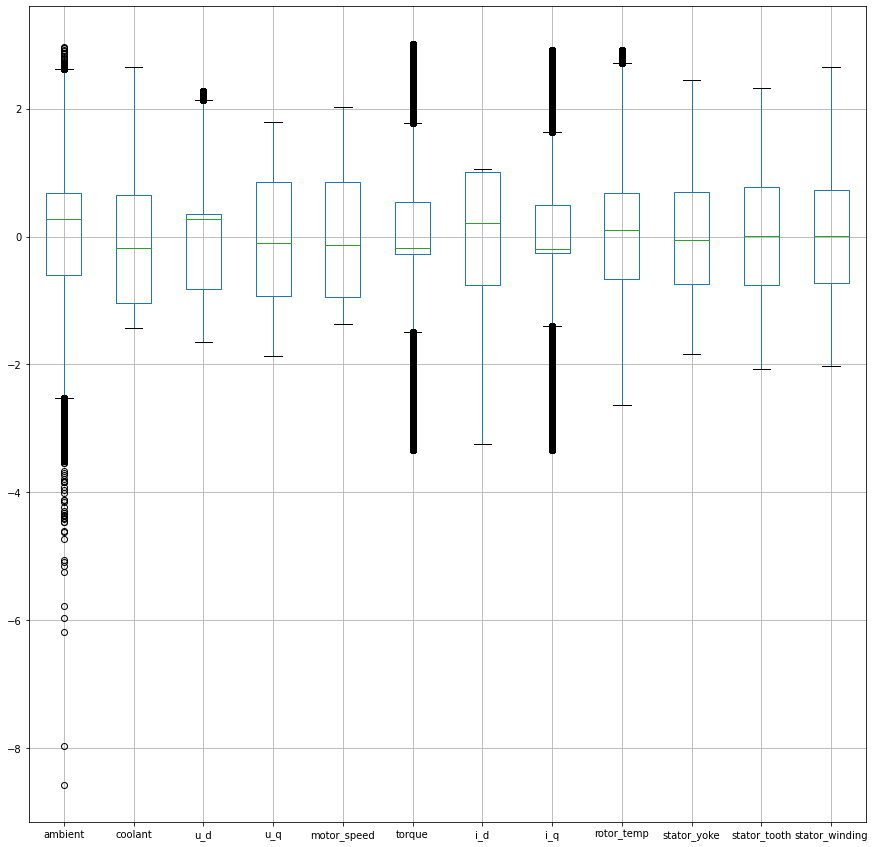

In [25]:
# We'll try to improve value of rotor_temp modeln by removing outliers

df.boxplot(figsize=(15,15))

In [26]:
df.i_q.describe()


new_df = df[(df.i_q >= -1.8) & (df.i_q < 2)]
new_df = new_df[(new_df.ambient >-2.4) & (new_df.ambient<2.4)]


<class 'pandas.core.frame.DataFrame'>
Int64Index: 879053 entries, 0 to 998069
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         879053 non-null  float64
 1   coolant         879053 non-null  float64
 2   u_d             879053 non-null  float64
 3   u_q             879053 non-null  float64
 4   motor_speed     879053 non-null  float64
 5   torque          879053 non-null  float64
 6   i_d             879053 non-null  float64
 7   i_q             879053 non-null  float64
 8   rotor_temp      879053 non-null  float64
 9   stator_yoke     879053 non-null  float64
 10  stator_tooth    879053 non-null  float64
 11  stator_winding  879053 non-null  float64
dtypes: float64(12)
memory usage: 87.2 MB


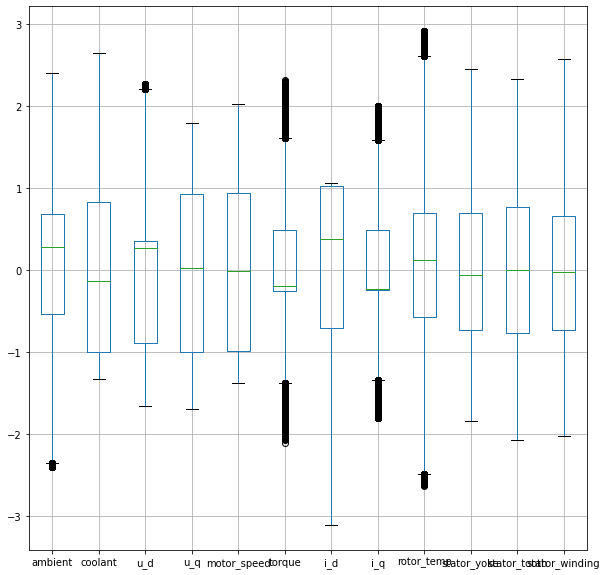

In [27]:
new_df.boxplot(figsize=(10,10))
new_df.info()

In [28]:
new_df.info()
X_r = df.drop(['torque', 'rotor_temp'], axis = 1)
y_r = df.rotor_temp

X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size= 0.2, random_state = 0)

model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


#model is not improving even after removing the outliers

<class 'pandas.core.frame.DataFrame'>
Int64Index: 879053 entries, 0 to 998069
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   ambient         879053 non-null  float64
 1   coolant         879053 non-null  float64
 2   u_d             879053 non-null  float64
 3   u_q             879053 non-null  float64
 4   motor_speed     879053 non-null  float64
 5   torque          879053 non-null  float64
 6   i_d             879053 non-null  float64
 7   i_q             879053 non-null  float64
 8   rotor_temp      879053 non-null  float64
 9   stator_yoke     879053 non-null  float64
 10  stator_tooth    879053 non-null  float64
 11  stator_winding  879053 non-null  float64
dtypes: float64(12)
memory usage: 87.2 MB
0.7716228076705012


In [29]:
# Lets try using decision tree for out model

In [30]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=100)


X_r = df.drop(['torque', 'rotor_temp'], axis = 1)
y_r = df.torque
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size= 0.2, random_state = 20)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.9999028787548248


### We are getting 99.7 percent accuracy for rotor and 99.999 for torque  using decision tree

In [31]:
from sklearn.tree import DecisionTreeRegressor

tree = DecisionTreeRegressor(random_state=100)


X_r = df.drop(['torque', 'rotor_temp'], axis = 1)
y_r = df.rotor_temp
X_train, X_test, y_train, y_test = train_test_split(X_r, y_r, test_size= 0.2, random_state = 20)

tree.fit(X_train, y_train)
y_pred = tree.predict(X_test)
r2 = r2_score(y_test, y_pred)
print(r2)


0.9972281224509929


In [34]:
new_x = df[['ambient', 'coolant', 'u_d', 'u_q', 'motor_speed', 'i_d',
       'i_q', 'rotor_temp']]

In [40]:
new_y = df.stator_tooth

In [41]:
import statsmodels.api as sm


new_x = sm.add_constant(X)
model = sm.OLS(new_y,new_x).fit()

model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           stator_tooth   R-squared:                       1.000
Model:                            OLS   Adj. R-squared:                  1.000
Method:                 Least Squares   F-statistic:                 2.706e+32
Date:                Thu, 02 Jul 2020   Prob (F-statistic):               0.00
Time:                        12:13:52   Log-Likelihood:             3.0107e+07
No. Observations:              998070   AIC:                        -6.021e+07
Df Residuals:                  998059   BIC:                        -6.021e+07
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
const          -2.687e-15   1.92e-17   -139.838      0.000   -2.73e-15   -2.65e-15
ambient         1.051e-15    2.3e-17     45.637      0.000    1.01e-15     1.1e-15
coolant         8.913e-15   1.23e-16     72.412      0.000    8.67e-15    9.15e-15
u_d             9.051e-16   3.72e-17     24.310      0.000    8.32e-16    9.78e-16
u_q             2.915e-15   4.29e-17     67.877      0.000    2.83e-15       3e-15
motor_speed    -4.923e-15   7.01e-17    -70.260      0.000   -5.06e-15   -4.79e-15
i_d            -6.501e-15   5.62e-17   -115.643      0.000   -6.61e-15   -6.39e-15
i_q             2.142e-15   3.76e-17     56.910      0.000    2.07e-15    2.22e-15
stator_yoke    -5.061e-15   3.82e-16    -13.266      0.000   -5.81e-15   -4.31e-15
stator_tooth       1.0000    4.8e-16   2.08e+15      0.000       1.000       1.000
stator_winding -2.036e-15   2.37e-16     -8.585      0.000    -2.5e-15   -1.57e-15
==============================================================================
Omnibus:                    48139.211   Durbin-Watson:                   0.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            20072.761
Skew:                          -0.080   Prob(JB):                         0.00
Kurtosis:                       2.324   Cond. No.                         65.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The data is mild anonymized due to which we cant find much but after applying algorithms on stator, torque or rotro temperature we found the data is almost able to predict 95% plus in almost all cases.